In [1]:
import numpy as np

import torch

import matplotlib.pyplot as plt

import torch.nn as nn

from torchvision import datasets, transforms

import torchvision


Tensor creation from torch.tensor

In [3]:
arr=np.ones((3,3))

print("variable type of ndarray:",arr.dtype)

t_gpu=torch.tensor(arr,device='cuda')

t=torch.tensor(arr)

print("t_gpu:{}\nt:{}".format(t_gpu,t))

variable type of ndarray: float64
t_gpu:tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0', dtype=torch.float64)
t:tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


Tensor creation from torch.from

In [4]:
arr=np.array([[1,2,3],[4,5,6]])
t=torch.from_numpy(arr)
print("original output")
print("numpy array: ",arr)
print("tensor: ",t)

print("change arr")
arr[0,0]=0
print("numpy array: ",arr)
print("tensor: ",t)

print("change tensor")
t[0,0]=10
print("numpy array: ",arr)
print("tensor: ",t)


original output
numpy array:  [[1 2 3]
 [4 5 6]]
tensor:  tensor([[1, 2, 3],
        [4, 5, 6]])
change arr
numpy array:  [[0 2 3]
 [4 5 6]]
tensor:  tensor([[0, 2, 3],
        [4, 5, 6]])
change tensor
numpy array:  [[10  2  3]
 [ 4  5  6]]
tensor:  tensor([[10,  2,  3],
        [ 4,  5,  6]])


Tensor creation with numeric values

In [5]:
out_t=torch.tensor([1])
t_zeros1=torch.zeros((3,3))
t_zeros2=torch.zeros((3,3),out=out_t)
print("out_t:",out_t,"\nt_zeros1:",t_zeros1,"\nt_zeros2:",t_zeros2)
print("memory address of t_zeros2",id(t_zeros2),"memory address of out_t:",id(out_t))

out_t: tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]) 
t_zeros1: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 
t_zeros2: tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
memory address of t_zeros2 139935022317120 memory address of out_t: 139935022317120


Try tensor.zeros_like

In [6]:
t_zeros_like=torch.zeros_like(t)
print("t:",t)
print("t_zeros_like:",t_zeros_like)

t: tensor([[10,  2,  3],
        [ 4,  5,  6]])
t_zeros_like: tensor([[0, 0, 0],
        [0, 0, 0]])


create with probability

In [7]:
t_arrange1=torch.arange(1,11,3)
print("t_arrange1:",t_arrange1)
t_arrange2=torch.arange(1,11,2)
print("t_arrange1:",t_arrange2)

t_arrange1: tensor([ 1,  4,  7, 10])
t_arrange1: tensor([1, 3, 5, 7, 9])


create with linspace

In [8]:
t_linspace1=torch.linspace(1,100,3)
print("t_linspace1:",t_linspace1)


t_linspace1: tensor([  1.0000,  50.5000, 100.0000])


create with logspace

In [9]:
t_logspace1=torch.logspace(start=0.1,end=1.0,steps=5)
print("t_logspace1:",t_logspace1)

t_logspace2=torch.logspace(start=2,end=6,steps=3,base=2)
print("t_logspace2:",t_logspace2)


t_logspace1: tensor([ 1.2589,  2.1135,  3.5481,  5.9566, 10.0000])
t_logspace2: tensor([ 4., 16., 64.])


create with eye

In [10]:
t_eye1=torch.eye(2)
print("t_eye1:",t_eye1)
t_eye2=torch.eye(2,m=3)
print("t_eye2:",t_eye2)
t_eye3=torch.eye(2,m=1)
print("t_eye3:",t_eye3)




t_eye1: tensor([[1., 0.],
        [0., 1.]])
t_eye2: tensor([[1., 0., 0.],
        [0., 1., 0.]])
t_eye3: tensor([[1.],
        [0.]])


create with torch.normal

In [11]:
# both tensor

# need to declare type, long not supported
mean=torch.arange(1,5,dtype=torch.float)
std=torch.arange(1,5,dtype=torch.float)
t_normal1=torch.normal(mean,std)
print("both tensor")
print("mean:",mean,"std",std)
print(t_normal1)

# both scalar

# t_normal2=torch.normal(0,1)
# print("t_normal2:",t_normal2)

# when both scalar, size needed

# t_normal3=torch.normal(0,1,size=4)
# print("t_normal3:",t_normal3)

# size need to be tuple

t_normal3=torch.normal(0,1,size=(4,))
print("t_normal3:",t_normal3)

# std scalar, mean tensor
t_normal4=torch.normal(mean,1)
print("t_normal4:",t_normal4)

# std tensor, mean scalar
t_normal5=torch.normal(0,std)
print("t_normal5:",t_normal5)


both tensor
mean: tensor([1., 2., 3., 4.]) std tensor([1., 2., 3., 4.])
tensor([-0.0835,  1.2389,  3.4019,  6.0816])
t_normal3: tensor([-0.7236, -0.1122,  1.2378,  1.5338])
t_normal4: tensor([0.0912, 1.2405, 3.7386, 4.8725])
t_normal5: tensor([ 0.8876,  0.8422, -1.6846,  1.8306])


create with rand/randn

In [12]:
t_rand=torch.rand(2,3)
t_randn=torch.randn(2,3)
print("t_rand:",t_rand)
print("t_randn:",t_randn)


t_rand: tensor([[0.2669, 0.9708, 0.1873],
        [0.4312, 0.5337, 0.0377]])
t_randn: tensor([[-0.8886, -0.6943,  0.7431],
        [ 0.2563,  0.2272,  0.5342]])


torch cat

In [15]:
t_cat1=torch.cat([t_rand,t_randn],dim=0)
t_cat2=torch.cat([t_rand,t_randn],dim=1)
print("t_cat1:",t_cat1,"\nt_cat2:",t_cat2)

t_cat1: tensor([[ 0.2669,  0.9708,  0.1873],
        [ 0.4312,  0.5337,  0.0377],
        [-0.8886, -0.6943,  0.7431],
        [ 0.2563,  0.2272,  0.5342]]) 
t_cat2: tensor([[ 0.2669,  0.9708,  0.1873, -0.8886, -0.6943,  0.7431],
        [ 0.4312,  0.5337,  0.0377,  0.2563,  0.2272,  0.5342]])


torch stack

In [18]:
t_stack1=torch.stack([t_rand,t_randn],dim=1)
t_stack2=torch.stack([t_rand,t_randn],dim=2)

# Dimension out of range (expected to be in range of [-3, 2], but got 3)
# t_stack3=torch.stack([t_rand,t_randn],dim=3)
print("t_stack1:{} \nshape:{}".format(t_stack1,t_stack1.shape))
print("\nt_stack2:{} \nshape:{}".format(t_stack2,t_stack2.shape))

t_stack1:tensor([[[ 0.2669,  0.9708,  0.1873],
         [-0.8886, -0.6943,  0.7431]],

        [[ 0.4312,  0.5337,  0.0377],
         [ 0.2563,  0.2272,  0.5342]]]) 
shape:torch.Size([2, 2, 3])

t_stack2:tensor([[[ 0.2669, -0.8886],
         [ 0.9708, -0.6943],
         [ 0.1873,  0.7431]],

        [[ 0.4312,  0.2563],
         [ 0.5337,  0.2272],
         [ 0.0377,  0.5342]]]) 
shape:torch.Size([2, 3, 2])


tensor chunks

In [20]:
tensor_chunk_list1=torch.chunk(t_rand,dim=1,chunks=2)
tensor_chunk_list2=torch.chunk(t_rand,dim=0,chunks=3)
for tl1 in tensor_chunk_list1:
    print("\n",tl1,"shape:",tl1.shape)
for tl2 in tensor_chunk_list2:
    print("\n",tl2,"shape:",tl2.shape)


 tensor([[0.2669, 0.9708],
        [0.4312, 0.5337]]) shape: torch.Size([2, 2])

 tensor([[0.1873],
        [0.0377]]) shape: torch.Size([2, 1])

 tensor([[0.2669, 0.9708, 0.1873]]) shape: torch.Size([1, 3])

 tensor([[0.4312, 0.5337, 0.0377]]) shape: torch.Size([1, 3])


tensor split

In [21]:
tensor_split_list1=torch.split(t_rand,2,dim=1)
tensor_split_list2=torch.split(t_rand,[1,2],dim=1)
for tl1 in tensor_split_list1:
    print("\n",tl1,"shape:",tl1.shape)
for tl2 in tensor_split_list2:
    print("\n",tl2,"shape:",tl2.shape)


 tensor([[0.2669, 0.9708],
        [0.4312, 0.5337]]) shape: torch.Size([2, 2])

 tensor([[0.1873],
        [0.0377]]) shape: torch.Size([2, 1])

 tensor([[0.2669],
        [0.4312]]) shape: torch.Size([2, 1])

 tensor([[0.9708, 0.1873],
        [0.5337, 0.0377]]) shape: torch.Size([2, 2])


linear regression

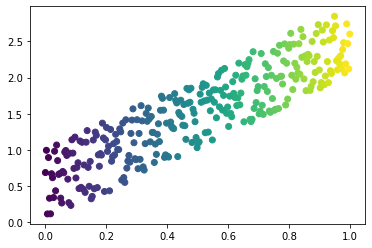

torch.Size([300, 1])


In [2]:
def create_linear_data(nums_data, if_plot= False):
    """
    Create data for linear model
    Args:
        nums_data: how many data points that wanted
    Returns:
        x with shape (nums_data, 1)
    """
    x = torch.linspace(0,1,nums_data)
    x = torch.unsqueeze(x,dim=1)
    k = 2
    y = k * x + torch.rand(x.size())
    
    if if_plot:
        plt.scatter(x.numpy(),y.numpy(),c=x.numpy())
        plt.show()
    data = {"x":x, "y":y}
    return data

data = create_linear_data(300, if_plot=True)
print(data["x"].size())

In [3]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
#         Call the parent class constructor to ensure that the program runs properly
        super().__init__()
#     Both input features and output features are 1
        self.linear = torch.nn.Linear(1,1)
#     This method is called when the class is called. 
#    The method name must be forward, and the return value of the method must have the same dimension as the output feature
    def forward(self,x):
#         predict x
        out=self.linear(x)
        return out
linear=LinearRegression()
print(linear)
        

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [11]:
class Linear_Model():
    def __init__(self):
        self.learning_rate=0.02
        self.epoches=8000
        self.loss_function=torch.nn.MSELoss()
        self.create_model()
    def create_model(self):
        self.model=LinearRegression()
        self.optimizer=torch.optim.SGD(self.model.parameters(),lr=self.learning_rate)
    def train(self,data):
        x=data["x"]
        y=data["y"]
        for epoch in range(self.epoches):
            prediction=self.model(x)
            loss=self.loss_function(prediction,y)
#             The gradient needs to be zeroed at the beginning of each iteration 
#             in order to calculate the gradient for the current iteration.
            self.optimizer.zero_grad()
#     Calculate the gradient of the loss function with respect to the model parameters
            loss.backward()
#     Update the model parameters according to the calculated gradient
            self.optimizer.step()
            if epoch%500==0:
                print("epoch:{},loss is:{}".format(epoch,loss.item()))
#             Save model parameters only
            torch.save(self.model.state_dict(),"./linearRegression/epoch"+str(epoch))
    def test(self,x,model_path):
        x=data["x"]
        y=data["y"]
        self.model.load_state_dict(torch.load(model_path))
        prediction=self.model(x)
        plt.scatter(x.numpy(),y.numpy(),c=x.numpy())
        plt.plot(x.numpy(),prediction.detach().numpy(),c="r")
        plt.show()
    def compare_epoches(self,data):
        x=data["x"]
        y=data["y"]
        num_pic=8
        current_fig=0
        for epoch in range(self.epoches):
            if epoch % (self.epoches/num_pic)==0:
                self.model.load_state_dict(torch.load("./linearRegression/epoch"+str(epoch)))
                prediction=self.model(x)
                current_fig+=1
                plt.subplot(4,2,current_fig)
                plt.scatter(x.numpy(),y.numpy(),c=x.numpy())
                plt.plot(x.numpy(),prediction.detach().numpy(),c="r")
        plt.show()
        

In [12]:
linear = Linear_Model()
data = create_linear_data(100)
linear.train(data)

epoch:0,loss is:1.154018759727478
epoch:500,loss is:0.08935971558094025
epoch:1000,loss is:0.08717039227485657
epoch:1500,loss is:0.08702113479375839
epoch:2000,loss is:0.087010957300663
epoch:2500,loss is:0.08701024949550629
epoch:3000,loss is:0.0870102122426033
epoch:3500,loss is:0.0870102122426033
epoch:4000,loss is:0.0870102122426033
epoch:4500,loss is:0.0870102122426033
epoch:5000,loss is:0.0870102122426033
epoch:5500,loss is:0.0870102122426033
epoch:6000,loss is:0.0870102122426033
epoch:6500,loss is:0.0870102122426033
epoch:7000,loss is:0.0870102122426033
epoch:7500,loss is:0.0870102122426033


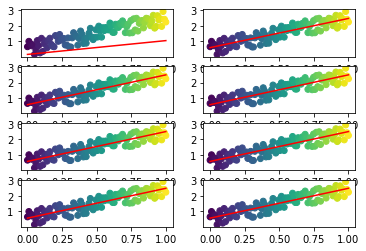

In [13]:
linear.compare_epoches(data)

MLP

In [6]:
N=64
dataIn=1000
hiddenLayer=100
dataOut=10
x=torch.randn(N,dataIn)
y=torch.randn(N,dataOut)
class MLP(torch.nn.Module):
    def __init__(self,dataIn,hiddenLayer,dataOut):
        super().__init__()
        self.linear1=nn.Linear(dataIn,hiddenLayer,bias=False)
        self.relu=nn.ReLU()
        self.linear2=nn.Linear(hiddenLayer,dataOut,bias=False)
    def forward(self,x):
        y_pred=self.linear2(self.relu(self.linear1(x)))
        return y_pred
MLPmodel=MLP(dataIn,hiddenLayer,dataOut)
loss_function=nn.MSELoss()
learning_rate=1e-4
optimizer=torch.optim.Adam(MLPmodel.parameters(),lr=learning_rate)
for epoch in range(500):
    y_pred=MLPmodel(x)
    loss=loss_function(y_pred,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch%100==0:
        print("epoch:",epoch,",loss is:",loss.item())

epoch: 0 ,loss is: 0.9859086275100708
epoch: 100 ,loss is: 0.07149328291416168
epoch: 200 ,loss is: 0.0009832008508965373
epoch: 300 ,loss is: 5.608582341665169e-06
epoch: 400 ,loss is: 1.0789385385123751e-08


softmax

In [2]:
# dataset preparation
batch_size=64
train_dataset=datasets.MNIST(root='./mnist_data',train=False,transform=transforms.ToTensor(),download=True)
test_dataset=datasets.MNIST(root='./mnist_data',train=False,transform=transforms.ToTensor())
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

/opt/conda/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [33]:
from torch.autograd import Variable
class softmaxNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1=nn.Linear(784,512)
        self.relu=nn.ReLU()
        self.linear2=nn.Linear(512,128)
        self.linear3=nn.Linear(128,32)
        self.linear4=nn.Linear(32,10)
        self.LogSoftmax = nn.LogSoftmax(dim=1)
    def forward(self,x):
#         -1 means inferred using numbers in other positions, similar to a wildcard
        x=x.view(-1,784)
        x=self.relu(self.linear1(x))
        x=self.relu(self.linear2(x))
        x=self.relu(self.linear3(x))
#         return nn.Softmax(x)
        return self.LogSoftmax(self.linear4(x))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:",device)

softmaxModel=softmaxNet().to(device)

# softmaxModel.to(device)
# loss_function=nn.MSELoss()
loss_function=nn.NLLLoss()
learning_rate=1e-4
optimizer=torch.optim.Adam(softmaxModel.parameters(),lr=learning_rate)
def train(epoch):
    for batch_idx, (data,target) in enumerate(train_loader):
#         data,target=Variable(data),Variable(target)
        data = data.to(device=device)
        target = target.to(device=device)
        y_pred=softmaxModel(data)
        loss=loss_function(y_pred,target)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print("Train epoch:",epoch,",loss:",loss.item())
def test():
    test_loss=0
    correct=0
    for data, target in test_loader:
#         data,target = Variable(data,violate=True),Variable(target)
        data = data.to(device=device)
        target = target.to(device=device)
        y_pred=softmaxModel(data)
#         test_loss+=nn.NLLLoss(y_pred,target).item()
        test_loss+=loss_function(y_pred,target)
#         max index
        pred=torch.argmax(y_pred,dim=1)
        correct+=pred.eq(target.data.view_as(pred)).sum()
    total_test_lost=test_loss/len(test_loader.dataset)
#     print("\nTest set average loss",test_loss)
    print("\nTest set average loss:{:.4f}".format(total_test_lost))
for epoch in range(0,10):
    train(epoch)
    test()

device: cuda
Train epoch: 0 ,loss: 0.32044947147369385

Test set average loss:0.0049
Train epoch: 1 ,loss: 0.17431554198265076

Test set average loss:0.0037
Train epoch: 2 ,loss: 0.07786283642053604

Test set average loss:0.0031
Train epoch: 3 ,loss: 0.07204136252403259

Test set average loss:0.0026
Train epoch: 4 ,loss: 0.07465073466300964

Test set average loss:0.0023
Train epoch: 5 ,loss: 0.21050934493541718

Test set average loss:0.0020
Train epoch: 6 ,loss: 0.03415130823850632

Test set average loss:0.0019
Train epoch: 7 ,loss: 0.023799166083335876

Test set average loss:0.0018
Train epoch: 8 ,loss: 0.009239327162504196

Test set average loss:0.0017
Train epoch: 9 ,loss: 0.16119284927845

Test set average loss:0.0016


CNN

In [48]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
#         The input channel is 1 for monochrome pictures and 3 for color pictures.
        self.conv1=nn.Conv2d(in_channels=1,out_channels=4,kernel_size=2,stride=1,padding=1)
        self.conv2=nn.Conv2d(in_channels=4,out_channels=16,kernel_size=2,stride=1,padding=1)
        self.relu=nn.ReLU()
        self.pool=nn.MaxPool2d(kernel_size=2)
#         self.linear=nn.Linear(16*25*25,10)
        self.linear=nn.Linear(16*7*7,10)
        self.LogSoftmax = nn.LogSoftmax(dim=1)
    def forward(self,x):
        x=self.pool(self.relu(self.conv1(x)))
        x=self.pool(self.relu(self.conv2(x)))
# Testing the output dimension of the convolutional layer
#         print(x.size())        

#         Adjust the shape of the tensor, x.size(0) means keep the first dimension unchanged, 
#         -1 means calculate the remaining dimension automatically. 
#         It performs a flattening operation to convert the multidimensional tensor output by x from the convolution layer 
#         to a one-dimensional tensor for input to the fully connected layer.

        x = x.view(x.size(0), -1)  
#         print(x.size())
        x=self.linear(x)
        return self.LogSoftmax(x)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:",device)

CNNModel=CNN().to(device)

# softmaxModel.to(device)
# loss_function=nn.MSELoss()
loss_function=nn.NLLLoss()
learning_rate=1e-4
optimizer=torch.optim.Adam(softmaxModel.parameters(),lr=learning_rate)
def CNNtrain(epoch):
    total_loss=0
    for data,target in train_loader:
        data = data.to(device=device)
        target = target.to(device=device)
        CNNModel.train()
        y_pred=CNNModel(data)
        loss=loss_function(y_pred,target)
        total_loss=total_loss+loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print("epoch=",epoch,"Loss={:.4f}".format(total_loss/len(train_loader.dataset)))
def CNNtest():
    test_loss=0
    correct=0
    for data,target in test_loader:
        data = data.to(device=device)
        target = target.to(device=device)
        y_pred=CNNModel(data)
        test_loss+=loss_function(y_pred,target)
#         max index
        pred=torch.argmax(y_pred,dim=1)
        correct+=pred.eq(target.data.view_as(pred)).sum()
    total_test_lost=test_loss/len(test_loader.dataset)
#     print("\nTest set average loss",test_loss)
    print("Test set average loss:{:.4f}".format(total_test_lost))
for epoch in range(0,10):
    CNNtrain(epoch)
    CNNtest()

device: cuda
epoch= 0 Loss=0.0361
Test set average loss:0.0363
epoch= 1 Loss=0.0361
Test set average loss:0.0363
epoch= 2 Loss=0.0361
Test set average loss:0.0363
epoch= 3 Loss=0.0361
Test set average loss:0.0363
epoch= 4 Loss=0.0361
Test set average loss:0.0363
epoch= 5 Loss=0.0361
Test set average loss:0.0363
epoch= 6 Loss=0.0361
Test set average loss:0.0363
epoch= 7 Loss=0.0361
Test set average loss:0.0363
epoch= 8 Loss=0.0361
Test set average loss:0.0363
epoch= 9 Loss=0.0361
Test set average loss:0.0363


Exercise： AlexNet(modern CNN)

In [2]:
batch_size=64
resize=224
trans = []
trans.append(torchvision.transforms.Resize(size=resize))
trans.append(torchvision.transforms.ToTensor())
transform = torchvision.transforms.Compose(trans)

# tr_FM=datasets.FashionMNIST(root='./fashion_mnist',train=True,transform=transforms.ToTensor())
# test_FM=datasets.FashionMNIST(root='./fashion_mnist',train=False,transform=transforms.ToTensor())

tr_FM=datasets.FashionMNIST(root='./fashion_mnist',train=True,transform=transform)
test_FM=datasets.FashionMNIST(root='./fashion_mnist',train=False,transform=transform)

# train_dataset=datasets.MNIST(root='./mnist_data',train=True,transform=transforms.ToTensor(),download=True)
# test_dataset=datasets.MNIST(root='./mnist_data',train=False,transform=transforms.ToTensor())
train_loader_FM=torch.utils.data.DataLoader(dataset=tr_FM,batch_size=batch_size,shuffle=True)
test_loader_FM=torch.utils.data.DataLoader(dataset=test_FM,batch_size=batch_size,shuffle=False)

/opt/conda/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
torch.cuda.empty_cache()

In [4]:
class AlexNet(nn.Module):
    def __init__(self):
        super().__init__()
#         The input channel is 1 for monochrome pictures and 3 for color pictures.
        self.conv1=nn.Conv2d(in_channels=1,out_channels=96,kernel_size=11,stride=4)
        self.conv2=nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,stride=1,padding=2)
        self.conv3=nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,stride=1,padding=1)
        self.conv4=nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,stride=1,padding=1)
        self.conv5=nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,stride=1,padding=1)
        self.linear1=nn.Linear(256*5*5,4096)
        self.linear2=nn.Linear(4096,4096)
        self.linear3=nn.Linear(4096,10)
        self.dropout=nn.Dropout(0.5)
        self.relu=nn.ReLU()
        self.pool=nn.MaxPool2d(kernel_size=3,stride=2)
#         self.linear=nn.Linear(16*25*25,10)
        
    def forward(self,x):
        x=self.pool(self.relu(self.conv1(x)))
        x=self.pool(self.relu(self.conv2(x)))
        x=self.relu(self.conv3(x))
        x=self.relu(self.conv4(x))
        x=self.pool(self.relu(self.conv5(x)))
# Testing the output dimension of the convolutional layer
#         print(x.size())        

#         Adjust the shape of the tensor, x.size(0) means keep the first dimension unchanged, 
#         -1 means calculate the remaining dimension automatically. 
#         It performs a flattening operation to convert the multidimensional tensor output by x from the convolution layer 
#         to a one-dimensional tensor for input to the fully connected layer.

        x = x.view(x.size(0), -1)  
#         print(x.size())
#         x=self.dropout(self.relu(self.linear1(x)))
        x=(self.relu(self.linear1(x)))
#         x=self.dropout(self.relu(self.linear2(x)))
        x=(self.relu(self.linear2(x)))
        x=self.relu(self.linear3(x))
        return x



# class AlexNet(nn.Module):
#     def __init__(self):
#         super(AlexNet, self).__init__()
#         self.conv = nn.Sequential(
#             nn.Conv2d(1, 48, 11, 4), # in_channels, out_channels, kernel_size, stride, padding
#             nn.ReLU(),
#             nn.MaxPool2d(3, 2), # kernel_size, stride
#             # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
#             nn.Conv2d(48, 128, 5, 1, 2),
#             nn.ReLU(),
#             nn.MaxPool2d(3, 2),
#             # 连续3个卷积层，且使用更小的卷积窗口。除了最后的卷积层外，进一步增大了输出通道数。
#             # 前两个卷积层后不使用池化层来减小输入的高和宽
#             nn.Conv2d(128, 192, 3, 1, 1),
#             nn.ReLU(),
#             nn.Conv2d(192, 192, 3, 1, 1),
#             nn.ReLU(),
#             nn.Conv2d(192, 128, 3, 1, 1),
#             nn.ReLU(),
#             nn.MaxPool2d(3, 2)
#         )
#          # 这里全连接层的输出个数比LeNet中的大数倍。使用丢弃层来缓解过拟合
#         self.fc = nn.Sequential(
#             nn.Linear(128*5*5, 2048),
#             nn.ReLU(),
#             nn.Dropout(0.5),
#             #由于使用CPU镜像，精简网络，若为GPU镜像可添加该层
#             #nn.Linear(4096, 4096),
#             #nn.ReLU(),
#             #nn.Dropout(0.5),

#             # 输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
#             nn.Linear(2048, 10),
#         )

#     def forward(self, img):

#         feature = self.conv(img)
#         output = self.fc(feature.view(img.shape[0], -1))
#         return output


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:",device)
anM=AlexNet().to(device)
# CNNModel=CNN().to(device)
loss_function=nn.NLLLoss()
learning_rate=1e-4
optimizer=torch.optim.SGD(anM.parameters(),lr=learning_rate)
def antrain(epoch):
    total_loss=0
    for data,target in train_loader_FM:
        data = data.to(device=device)
        target = target.to(device=device)
        anM.train()
        y_pred=anM(data)
        loss=loss_function(y_pred,target)
        total_loss=total_loss+loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print("epoch=",epoch)
def antest():
    test_loss=0
    correct=0
#     This line is needed so that the gradient is not saved during the test to avoid memory explosion
    with torch.no_grad():
        for data,target in test_loader_FM:
            data = data.to(device=device)
            target = target.to(device=device)
            y_pred=anM(data)
            test_loss+=loss_function(y_pred,target)
#         max index
            pred=torch.argmax(y_pred,dim=1)
            correct+=pred.eq(target.data.view_as(pred)).sum()
    total_test_lost=test_loss/len(test_loader_FM.dataset)
#     print("\nTest set average loss",test_loss)
    print("Test set average loss:{:.4f}".format(total_test_lost))
for epoch in range(0,10):
    antrain(epoch)
    antest()

device: cuda


/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch= 0
Test set average loss:-0.0002
epoch= 1
Test set average loss:-0.0003
epoch= 2
Test set average loss:-0.0004
epoch= 3
Test set average loss:-0.0005
epoch= 4
Test set average loss:-0.0006
epoch= 5
Test set average loss:-0.0007
epoch= 6
Test set average loss:-0.0008
epoch= 7
Test set average loss:-0.0009
epoch= 8
Test set average loss:-0.0011
epoch= 9
Test set average loss:-0.0012


In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:",device)
anM=AlexNet().to(device)
loss_function=nn.NLLLoss()
learning_rate=1e-4
optimizer=torch.optim.SGD(anM.parameters(),lr=learning_rate)
# optimizer=torch.optim.Adam(anM.parameters(),lr=learning_rate)

def antrain(epochs=10,model=anM,optimizer=optimizer,loss_fn=loss_function,trainSet=train_loader_FM,testSet=test_loader_FM):
    lossList=[]
    testAcc=[]
    for epoch in range(epochs):
        lossSum=0.0
        print("epoch:{:d}/{:d}".format(epoch,epochs))
        model.train()
        for idx,(img,label) in enumerate(trainSet):
            img=img.to(device)
            label=label.to(device)
            optimizer.zero_grad()
            out=model(img)
            loss=loss_fn(out,label)
            loss.backward()
            optimizer.step()
            lossSum+=loss.item()
            if (idx+1)%100==0:
                print("batch:{:d}/{:d}-->loss:{:.4f}".format(idx+1,len(trainSet),loss.item()))
#       Do not enable batchnormalization and dropout to ensure that BN and dropout do not change
        model.eval()
        accNum=0
        testNum=0
        with torch.no_grad():
            for idx,(img,label) in enumerate(testSet):
                testNum+=label.shape[0]
                img=img.to(device)
                label=label.to(device)
                out=model(img)
                preds=out.argmax(dim=1)
                accNum+=int((preds==label).sum())
            testAcc.append(accNum/testNum)
        print("epoch:{:d}_acc:{:.2%}".format(epoch,testAcc[-1]))
        
antrain(15,anM,optimizer,loss_function,train_loader_FM,test_loader_FM)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("device:",device)
# anM=AlexNet().to(device)
# loss_function=nn.NLLLoss()
# learning_rate=1e-4
# optimizer=torch.optim.Adam(anM.parameters(),lr=learning_rate)

device: cuda
epoch:0/15
batch:100/938-->loss:-0.0096
batch:200/938-->loss:-0.0097
batch:300/938-->loss:-0.0114
batch:400/938-->loss:-0.0108
batch:500/938-->loss:-0.0135
batch:600/938-->loss:-0.0163
batch:700/938-->loss:-0.0170
batch:800/938-->loss:-0.0162
batch:900/938-->loss:-0.0192
epoch:0_acc:10.00%
epoch:1/15
batch:100/938-->loss:-0.0199
batch:200/938-->loss:-0.0205
batch:300/938-->loss:-0.0196
batch:400/938-->loss:-0.0235
batch:500/938-->loss:-0.0267
batch:600/938-->loss:-0.0208
batch:700/938-->loss:-0.0261
batch:800/938-->loss:-0.0254
batch:900/938-->loss:-0.0284
epoch:1_acc:10.00%
epoch:2/15
batch:100/938-->loss:-0.0280


KeyboardInterrupt: 

总结：网络模型并不难搭建，但消耗了大量时间在处理显存爆炸上。排查原因时被误导认为是由于adam优化器在kaiming方法初始化时loss较大。CUDA在处理大数除法时导致了显存爆炸。而删除大数除法后，显存爆炸依然出现。进而发现是测试时没有写torch.no_grad()语句，导致测试时依然进行了梯度的计算，从而导致了显存的爆炸。此前程序中最后的大数除法语句打印未完成怀疑是其开展了并行计算，而大数运算较为费时，导致了输出语句不成功。

Summary: The network model was not difficult to build, but it consumed a lot of time in dealing with the memory explosion. I was misled to believe that the adam optimizer had a large loss when initializing the kaiming method, and CUDA caused the memory explosion when processing large divisions. After removing the large division, the memory explosion still occurs. It was found that the test did not write the torch.no_grad() statement, which caused the test to still perform the gradient calculation, thus causing the memory explosion. Previously, the last large division statement in the program did not complete printing suspected that it carried out parallel computing, and the large number operation is more time-consuming, resulting in unsuccessful output statements.

ResNet(use plus)

In [17]:
class Resnet(nn.Module):
    def __init__(self,use_1x1conv=False,stride=1):
        super().__init__()
        self.conv1=nn.Conv2d(3,32,5,padding=2,stride=stride)
        self.conv2=nn.Conv2d(32,3,3,padding=1)
        if use_1x1conv:
            self.conv3=nn.Conv2d(3,3,1,stride=stride)
        else:
            self.conv3=None
#             Normalization with the same number of parameters as the output channels
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(3)
        self.relu=nn.ReLU()
    def forward(self,x):
        Y=self.relu(self.bn1(self.conv1(x)))
        Y=self.bn2(self.conv2(Y))
        if self.conv3:
            x=self.conv3(x)
#             Need to control the x and y dimensions exactly the same
        print(x.shape)
        print(Y.shape)
        return self.relu(Y+x)
resNetTest1=Resnet()
test1=torch.rand((4,3,7,7))
resNetTest2=Resnet(use_1x1conv=True,stride=2)
test2=torch.rand((4,3,7,7))
print(resNetTest1(test1).shape)
print(resNetTest2(test2).shape)

torch.Size([4, 3, 7, 7])
torch.Size([4, 3, 7, 7])
torch.Size([4, 3, 7, 7])
torch.Size([4, 3, 4, 4])
torch.Size([4, 3, 4, 4])
torch.Size([4, 3, 4, 4])


DenseNet(use concatnate)

In [31]:
# DenseBlock
def conv_block(in_channels,out_channels):
    blk=nn.Sequential(nn.BatchNorm2d(in_channels),nn.ReLU(),nn.Conv2d(in_channels,out_channels,3,padding=1))
    return blk
class DenseBlock(nn.Module):
    def __init__(self,num_convs,in_channels,out_channels):
        super().__init__()
        net=[]
#         The input of each layer contains the output of all previous layers
        for i in range(num_convs):
            in_c=in_channels+i*out_channels
            net.append(conv_block(in_c,out_channels))
#             It is a container that stores different modules and automatically adds the parameters of each module to the network. 
#             Modules added to nn.ModuleList are automatically registered to the entire neural network, 
#             and the parameters of the modules are also automatically added to the entire network.
        self.net=nn.ModuleList(net)
        self.out_channels=in_channels+num_convs*out_channels
    def forward(self,x):
        for block in self.net:
            Y=block(x)
#             print("x,",x.shape)
#             print("Y,",Y.shape)
            x=torch.cat((x,Y),dim=1)
        return x
block=DenseBlock(2,3,10)
x=torch.rand(4,3,8,8)
Y=block(x)
print(Y.shape)

torch.Size([4, 23, 8, 8])


In [29]:
# TransitionBlock
def transition_block(in_channels,out_channels):
#     print("in:",in_channels,"\tout:",out_channels)
    block=nn.Sequential(nn.BatchNorm2d(in_channels),nn.ReLU(),nn.Conv2d(in_channels,out_channels,kernel_size=1),
                        nn.AvgPool2d(kernel_size=2,stride=2))
    return block
block=transition_block(23,10)
testData=torch.rand(4,23,8,8)
print(block(Y).shape)
    

torch.Size([4, 10, 4, 4])


In [47]:
class DenseNet(nn.Module):
    def __init__(self):
        super().__init__()
#         Use nn.sequential without writing additional forward functions
        self.net=nn.Sequential(nn.Conv2d(1,64,kernel_size=7,stride=2,padding=3),nn.BatchNorm2d(64),nn.ReLU(),
                               nn.MaxPool2d(kernel_size=3,stride=2,padding=1))
        self.num_channels=64
        self.growth_rate=32
        self.num_convs_in_dense_blocks=[4,4,4,4]
        for i,num_convs in enumerate(self.num_convs_in_dense_blocks):
            DB=DenseBlock(num_convs,self.num_channels,self.growth_rate)
            self.net.add_module("DenseBlock_{:d}".format(i),DB)
#             Number of output channels of the previous denseblock
            self.num_channels=DB.out_channels
#             Add transition layer between denseblock
            if i!=len(self.num_convs_in_dense_blocks)-1:
#         Use integer division instead of floating point division
                tran_out_channel=self.num_channels//2
#                 print(tran_out_channel)
                self.net.add_module("transition_block_{:d}".format(i),transition_block(self.num_channels, tran_out_channel))
                self.num_channels=tran_out_channel
        self.net.add_module("batchnorm",nn.BatchNorm2d(self.num_channels))
        self.net.add_module("ReLu",nn.ReLU())
        self.net.add_module("global_average_pool",nn.AvgPool2d(kernel_size=3))
#         add flatten layer
        self.net.add_module("flatten_layer",nn.Flatten(start_dim=1,end_dim=-1))

        self.net.add_module("full_connect",nn.Linear(self.num_channels,10))
    def forward(self,x):
        return self.net(x)
dn=DenseNet()
x=torch.rand(1,1,96,96)
for name,layer in dn.net.named_children():
    x=layer(x)
    print(name,' output shape:\t',x.shape)

0  output shape:	 torch.Size([1, 64, 48, 48])
1  output shape:	 torch.Size([1, 64, 48, 48])
2  output shape:	 torch.Size([1, 64, 48, 48])
3  output shape:	 torch.Size([1, 64, 24, 24])
DenseBlock_0  output shape:	 torch.Size([1, 192, 24, 24])
transition_block_0  output shape:	 torch.Size([1, 96, 12, 12])
DenseBlock_1  output shape:	 torch.Size([1, 224, 12, 12])
transition_block_1  output shape:	 torch.Size([1, 112, 6, 6])
DenseBlock_2  output shape:	 torch.Size([1, 240, 6, 6])
transition_block_2  output shape:	 torch.Size([1, 120, 3, 3])
DenseBlock_3  output shape:	 torch.Size([1, 248, 3, 3])
batchnorm  output shape:	 torch.Size([1, 248, 3, 3])
ReLu  output shape:	 torch.Size([1, 248, 3, 3])
global_average_pool  output shape:	 torch.Size([1, 248, 1, 1])
flatten_layer  output shape:	 torch.Size([1, 248])
full_connect  output shape:	 torch.Size([1, 10])


In [44]:
batch_size=64
resize=96
trans = []
trans.append(torchvision.transforms.Resize(size=resize))
trans.append(torchvision.transforms.ToTensor())
transform = torchvision.transforms.Compose(trans)

# tr_FM=datasets.FashionMNIST(root='./fashion_mnist',train=True,transform=transforms.ToTensor())
# test_FM=datasets.FashionMNIST(root='./fashion_mnist',train=False,transform=transforms.ToTensor())

tr_FM_96=datasets.FashionMNIST(root='./fashion_mnist',train=True,transform=transform)
test_FM_96=datasets.FashionMNIST(root='./fashion_mnist',train=False,transform=transform)

# train_dataset=datasets.MNIST(root='./mnist_data',train=True,transform=transforms.ToTensor(),download=True)
# test_dataset=datasets.MNIST(root='./mnist_data',train=False,transform=transforms.ToTensor())
train_loader_FM_96=torch.utils.data.DataLoader(dataset=tr_FM_96,batch_size=batch_size,shuffle=True)
test_loader_FM_96=torch.utils.data.DataLoader(dataset=test_FM_96,batch_size=batch_size,shuffle=False)

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:",device)
dn=DenseNet().to(device)
loss_function=nn.NLLLoss()
learning_rate=1e-4
optimizer=torch.optim.SGD(dn.parameters(),lr=learning_rate)
# optimizer=torch.optim.Adam(anM.parameters(),lr=learning_rate)

def dntrain(epochs=10,model=dn,optimizer=optimizer,loss_fn=loss_function,trainSet=train_loader_FM_96,testSet=test_loader_FM_96):
    lossList=[]
    testAcc=[]
    for epoch in range(epochs):
        lossSum=0.0
        print("epoch:{:d}/{:d}".format(epoch,epochs))
        model.train()
        for idx,(img,label) in enumerate(trainSet):
            img=img.to(device)
            label=label.to(device)
            optimizer.zero_grad()
            out=model(img)
            loss=loss_fn(out,label)
            loss.backward()
            optimizer.step()
            lossSum+=loss.item()
            if (idx+1)%100==0:
                print("batch:{:d}/{:d}-->loss:{:.4f}".format(idx+1,len(trainSet),loss.item()))
#       Do not enable batchnormalization and dropout to ensure that BN and dropout do not change
        model.eval()
        accNum=0
        testNum=0
        with torch.no_grad():
            for idx,(img,label) in enumerate(testSet):
                testNum+=label.shape[0]
                img=img.to(device)
                label=label.to(device)
                out=model(img)
                preds=out.argmax(dim=1)
                accNum+=int((preds==label).sum())
            testAcc.append(accNum/testNum)
        print("epoch:{:d}_acc:{:.2%}".format(epoch,testAcc[-1]))
        
dntrain(15,dn,optimizer,loss_function,train_loader_FM_96,test_loader_FM_96)

device: cuda
epoch:0/15
batch:100/938-->loss:-0.1422
batch:200/938-->loss:-0.1847
batch:300/938-->loss:-0.3787
batch:400/938-->loss:-0.3431
batch:500/938-->loss:-0.5428
batch:600/938-->loss:-0.6477
batch:700/938-->loss:-0.5477
batch:800/938-->loss:-0.7907
batch:900/938-->loss:-0.9363
epoch:0_acc:36.01%
epoch:1/15
batch:100/938-->loss:-1.0213
batch:200/938-->loss:-1.1694
batch:300/938-->loss:-1.2886
batch:400/938-->loss:-1.4049
batch:500/938-->loss:-1.3543
batch:600/938-->loss:-1.5944
batch:700/938-->loss:-1.6234
batch:800/938-->loss:-1.7634
batch:900/938-->loss:-1.9910
epoch:1_acc:39.71%
epoch:2/15
batch:100/938-->loss:-1.9456
batch:200/938-->loss:-2.1511
batch:300/938-->loss:-2.2159
batch:400/938-->loss:-2.3977
batch:500/938-->loss:-2.4004
batch:600/938-->loss:-2.5576
batch:700/938-->loss:-2.7275
batch:800/938-->loss:-2.6318
batch:900/938-->loss:-2.8441
epoch:2_acc:50.13%
epoch:3/15
batch:100/938-->loss:-3.2457
batch:200/938-->loss:-3.1561
batch:300/938-->loss:-3.5719
batch:400/938-->